In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
print(data.shape)
print(target.shape)

(10222,)
(10222, 120)


In [3]:
print(data[0])
print(target[0])

./breeds\affenpinscher\00ca18751837cd6a22813f8e221f7819.jpg
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=(100,100,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50,activation='relu'))

model.add(Dense(120,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

KeyboardInterrupt: 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,Dropout,BatchNormalization

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=(100,100,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))

model.add(Dense(120,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

In [11]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(100,100, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(120, activation="softmax")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    
    layer.trainable = False

model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][0]']         

In [12]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,
                         horizontal_flip=True,fill_mode="nearest")

In [13]:
import cv2
import os

img_size=100

def batcher(data,target):
    
    global img_size,batch_size
    
    def preprocess(img_name):

        img=cv2.imread(os.path.abspath(img_name))
        img=cv2.resize(img,(img_size,img_size))/255
        
        return img.reshape(img_size,img_size,3)

    while(True):
        
        data_new=[]
        target_new=[]
        
        #inds=np.arange(i,i+batch_size)
        inds=np.random.randint(0,len(data),batch_size)
        #print(inds)
        for index in inds:

            img = preprocess(data[index])
            img = aug.random_transform(img)  # Apply augmentation
            data_new.append(img)
            target_new.append(target[index])
        

        yield np.array(data_new),np.array(target_new)

In [14]:
def test_batcher(data,target):
    
    global img_size,batch_size
    
    def preprocess(img_name):

        img=cv2.imread(os.path.abspath(img_name))
        img=cv2.resize(img,(img_size,img_size))/255
        
        return img.reshape(img_size,img_size,3)

        
    data_new=[]
    target_new=[]


    for index in range(len(data)):

        data_new.append(preprocess(data[index]))
        target_new.append(target[index])


    return np.array(data_new),np.array(target_new)

In [15]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [16]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model',monitor='val_accuracy',save_best_only=True,mode='auto')

In [17]:
batch_size=32

model.fit(batcher(train_data,train_target),epochs=50,validation_data=batcher(test_data,test_target),batch_size=batch_size,
         steps_per_epoch=len(train_data)//batch_size,validation_steps=len(test_data)//batch_size,callbacks=[checkpoint])

Epoch 1/50
255/255 [==============================] - ETA: 0s - loss: 4.7993 - accuracy: 0.0140

INFO:tensorflow:Assets written to: models\model-001.model\assets


INFO:tensorflow:Assets written to: models\model-001.model\assets


255/255 [==============================] - 94s 358ms/step - loss: 4.7993 - accuracy: 0.0140 - val_loss: 4.7182 - val_accuracy: 0.0238
Epoch 2/50
255/255 [==============================] - ETA: 0s - loss: 4.6492 - accuracy: 0.0333

INFO:tensorflow:Assets written to: models\model-002.model\assets


INFO:tensorflow:Assets written to: models\model-002.model\assets


255/255 [==============================] - 89s 350ms/step - loss: 4.6492 - accuracy: 0.0333 - val_loss: 4.5002 - val_accuracy: 0.0461
Epoch 3/50
255/255 [==============================] - ETA: 0s - loss: 4.5206 - accuracy: 0.0436

INFO:tensorflow:Assets written to: models\model-003.model\assets


INFO:tensorflow:Assets written to: models\model-003.model\assets


255/255 [==============================] - 89s 350ms/step - loss: 4.5206 - accuracy: 0.0436 - val_loss: 4.3578 - val_accuracy: 0.0610
Epoch 4/50
255/255 [==============================] - ETA: 0s - loss: 4.4003 - accuracy: 0.0495

INFO:tensorflow:Assets written to: models\model-004.model\assets


INFO:tensorflow:Assets written to: models\model-004.model\assets


255/255 [==============================] - 90s 353ms/step - loss: 4.4003 - accuracy: 0.0495 - val_loss: 4.2199 - val_accuracy: 0.0655
Epoch 5/50
255/255 [==============================] - ETA: 0s - loss: 4.2989 - accuracy: 0.0564

INFO:tensorflow:Assets written to: models\model-005.model\assets


INFO:tensorflow:Assets written to: models\model-005.model\assets


255/255 [==============================] - 90s 352ms/step - loss: 4.2989 - accuracy: 0.0564 - val_loss: 4.0850 - val_accuracy: 0.0853
Epoch 6/50
255/255 [==============================] - ETA: 0s - loss: 4.2110 - accuracy: 0.0661

INFO:tensorflow:Assets written to: models\model-006.model\assets


INFO:tensorflow:Assets written to: models\model-006.model\assets


255/255 [==============================] - 89s 349ms/step - loss: 4.2110 - accuracy: 0.0661 - val_loss: 4.0008 - val_accuracy: 0.0923
Epoch 7/50
255/255 [==============================] - ETA: 0s - loss: 4.1720 - accuracy: 0.0723

INFO:tensorflow:Assets written to: models\model-007.model\assets


INFO:tensorflow:Assets written to: models\model-007.model\assets


255/255 [==============================] - 90s 354ms/step - loss: 4.1720 - accuracy: 0.0723 - val_loss: 3.9289 - val_accuracy: 0.1052
Epoch 8/50
255/255 [==============================] - ETA: 0s - loss: 4.1415 - accuracy: 0.0685

INFO:tensorflow:Assets written to: models\model-008.model\assets


INFO:tensorflow:Assets written to: models\model-008.model\assets


255/255 [==============================] - 88s 348ms/step - loss: 4.1415 - accuracy: 0.0685 - val_loss: 3.8763 - val_accuracy: 0.1181
Epoch 9/50
255/255 [==============================] - 72s 284ms/step - loss: 4.0986 - accuracy: 0.0783 - val_loss: 3.8692 - val_accuracy: 0.1156
Epoch 10/50
255/255 [==============================] - 73s 288ms/step - loss: 4.0454 - accuracy: 0.0869 - val_loss: 3.8100 - val_accuracy: 0.1052
Epoch 11/50
255/255 [==============================] - ETA: 0s - loss: 4.0406 - accuracy: 0.0815

INFO:tensorflow:Assets written to: models\model-011.model\assets


INFO:tensorflow:Assets written to: models\model-011.model\assets


255/255 [==============================] - 89s 349ms/step - loss: 4.0406 - accuracy: 0.0815 - val_loss: 3.8153 - val_accuracy: 0.1230
Epoch 12/50
255/255 [==============================] - 73s 288ms/step - loss: 4.0038 - accuracy: 0.0880 - val_loss: 3.8358 - val_accuracy: 0.1171
Epoch 13/50
255/255 [==============================] - ETA: 0s - loss: 3.9819 - accuracy: 0.0893

INFO:tensorflow:Assets written to: models\model-013.model\assets


INFO:tensorflow:Assets written to: models\model-013.model\assets


255/255 [==============================] - 90s 354ms/step - loss: 3.9819 - accuracy: 0.0893 - val_loss: 3.7588 - val_accuracy: 0.1290
Epoch 14/50
255/255 [==============================] - 74s 291ms/step - loss: 3.9896 - accuracy: 0.0801 - val_loss: 3.7321 - val_accuracy: 0.1131
Epoch 15/50
255/255 [==============================] - 73s 286ms/step - loss: 3.9803 - accuracy: 0.0879 - val_loss: 3.7449 - val_accuracy: 0.1250
Epoch 16/50
255/255 [==============================] - 74s 290ms/step - loss: 3.9430 - accuracy: 0.0968 - val_loss: 3.6825 - val_accuracy: 0.1290
Epoch 17/50
255/255 [==============================] - 73s 286ms/step - loss: 3.9351 - accuracy: 0.0920 - val_loss: 3.7497 - val_accuracy: 0.1255
Epoch 18/50
255/255 [==============================] - ETA: 0s - loss: 3.9234 - accuracy: 0.0977

INFO:tensorflow:Assets written to: models\model-018.model\assets


INFO:tensorflow:Assets written to: models\model-018.model\assets


255/255 [==============================] - 91s 357ms/step - loss: 3.9234 - accuracy: 0.0977 - val_loss: 3.7185 - val_accuracy: 0.1324
Epoch 19/50
255/255 [==============================] - ETA: 0s - loss: 3.9456 - accuracy: 0.0911

INFO:tensorflow:Assets written to: models\model-019.model\assets


INFO:tensorflow:Assets written to: models\model-019.model\assets


255/255 [==============================] - 90s 356ms/step - loss: 3.9456 - accuracy: 0.0911 - val_loss: 3.6625 - val_accuracy: 0.1409
Epoch 20/50
255/255 [==============================] - 73s 288ms/step - loss: 3.9019 - accuracy: 0.0995 - val_loss: 3.6598 - val_accuracy: 0.1240
Epoch 21/50
255/255 [==============================] - 74s 290ms/step - loss: 3.9214 - accuracy: 0.0945 - val_loss: 3.6620 - val_accuracy: 0.1374
Epoch 22/50
255/255 [==============================] - ETA: 0s - loss: 3.9026 - accuracy: 0.0985

INFO:tensorflow:Assets written to: models\model-022.model\assets


INFO:tensorflow:Assets written to: models\model-022.model\assets


255/255 [==============================] - 90s 354ms/step - loss: 3.9026 - accuracy: 0.0985 - val_loss: 3.6395 - val_accuracy: 0.1523
Epoch 23/50
255/255 [==============================] - 74s 289ms/step - loss: 3.9037 - accuracy: 0.1020 - val_loss: 3.5883 - val_accuracy: 0.1478
Epoch 24/50
255/255 [==============================] - 74s 293ms/step - loss: 3.8896 - accuracy: 0.0989 - val_loss: 3.6337 - val_accuracy: 0.1399
Epoch 25/50
255/255 [==============================] - 74s 291ms/step - loss: 3.8863 - accuracy: 0.1028 - val_loss: 3.6750 - val_accuracy: 0.1488
Epoch 26/50
255/255 [==============================] - 74s 291ms/step - loss: 3.9041 - accuracy: 0.0985 - val_loss: 3.6005 - val_accuracy: 0.1458
Epoch 27/50
255/255 [==============================] - ETA: 0s - loss: 3.8507 - accuracy: 0.1069

INFO:tensorflow:Assets written to: models\model-027.model\assets


INFO:tensorflow:Assets written to: models\model-027.model\assets


255/255 [==============================] - 90s 354ms/step - loss: 3.8507 - accuracy: 0.1069 - val_loss: 3.5917 - val_accuracy: 0.1677
Epoch 28/50
255/255 [==============================] - 73s 288ms/step - loss: 3.8677 - accuracy: 0.1042 - val_loss: 3.6377 - val_accuracy: 0.1404
Epoch 29/50
255/255 [==============================] - 74s 292ms/step - loss: 3.8595 - accuracy: 0.1042 - val_loss: 3.6022 - val_accuracy: 0.1453
Epoch 30/50
255/255 [==============================] - 75s 296ms/step - loss: 3.8340 - accuracy: 0.1058 - val_loss: 3.6282 - val_accuracy: 0.1379
Epoch 31/50
255/255 [==============================] - 74s 293ms/step - loss: 3.8509 - accuracy: 0.1039 - val_loss: 3.5926 - val_accuracy: 0.1473
Epoch 32/50
255/255 [==============================] - 74s 289ms/step - loss: 3.8597 - accuracy: 0.1009 - val_loss: 3.5712 - val_accuracy: 0.1612
Epoch 33/50
255/255 [==============================] - 74s 290ms/step - loss: 3.8452 - accuracy: 0.1089 - val_loss: 3.5665 - val_accurac

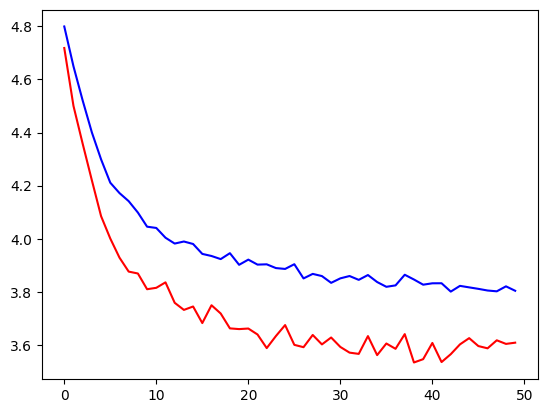

In [18]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],'b')
plt.plot(model.history.history['val_loss'],'r')

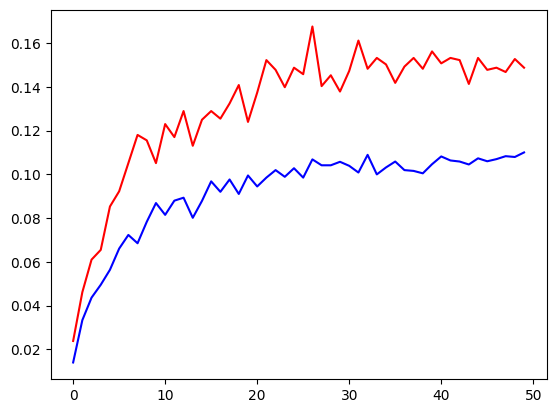

In [19]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['accuracy'],'b')
plt.plot(model.history.history['val_accuracy'],'r')

In [12]:
model.save_weights('dog-breed-prediction.h5')